# THỰC HÀNH

## Thống Kê Suy Luận

### Mở đầu

Hướng dẫn sử dụng notebook:
- Thực hành code theo hướng dẫn ở những ô có hashtag *# Quiz*.
- Không sửa code ở những ô có hashtag *# Test*. Code ở những ô này để kiểm tra kết quả.

#### Import thư viện

In [315]:
import operator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from functools import partial
from statsmodels.stats import weightstats

#### Các hàm so sánh

In [316]:
def test(a, b, cmp, cname=None):
    if cname is None:
        cname = cmp.__name__
    assert cmp(a, b), f'{cname}:\n{a}\n{b}'

In [317]:
def test_eq(a, b):
    test(a, b, operator.eq, '==')

In [318]:
def near(a, b):
    return np.allclose(a, b, rtol=1e-3, atol=1e-5)

In [319]:
def test_near(a, b):
    test(a, b, near)

In [320]:
test_eq(1, 1.0)
test_near(1, 1.000001)
test_near(1, 1.001000)

### Kiểm định giả thuyết

#### Một số khái niệm

- Giả thuyết không ($H_0$) được đặt ra với mục tiêu là xem dữ liệu thu thập trong các nghiên cứu thực nghiệm có mâu thuẫn gì với giả thuyết này không.
- Giả thuyết thay thế ($H_1$ hoặc $H_a$) là tuyên bố được kiểm chứng ngược lại với giả thuyết không.
- Mức độ quan trọng (level of significance or $\alpha$) là độ đo độ mạnh của bằng chứng xuất hiện trong tập mẫu để có thể loại bỏ giả thuyết không. $alpha$ xác định giá trị quan trọng (critical value).
- p-value là xác suất gắn với giá trị kiểm chứng (test statistic). p-value càng nhỏ, bằng chứng để loại giả thuyết không càng mạnh.
- Lỗi loại I là lỗi loại bỏ giả thuyết không mặc dù giả thuyết đó đúng.
- Lỗi loại II là lỗi chấp nhận giả thuyết không mặc dù giả thuyết đó sai.
- Kiểm chứng 1 phía là kiểm chứng mà vùng loại bỏ chỉ ở 1 bên của phân bố xác suất.
- Kiểm chứng 2 phía là kiểm chứng mà vùng loại bỏ nằm ở cả 2 bên của phân bố xác suất.
- Bậc tự do là thước đo mức độ dao động trong nghiên cứu, được quyết định bởi số lượng các nhóm mà bạn kiểm tra. Biểu thức bậc tự do được viết như sau: Bậc tự do bằng n-1, trong đó: "n" là số nhóm hoặc biến số được phân tích trong thí nghiệm.

Hình ảnh thể hiện kiểm chứng thống kê và kết luận tương ứng.

![](pic/0.jpg)

Quyết định cho $H_a$: không bằng.

#### Phân phối xác suất chuẩn

$f(x)={\frac{1}{\sigma {\sqrt{2\pi}}}e^{-{\frac{1}{2}}\left({\frac{x-\mu}{\sigma}}\right)^{2}}}$

In [321]:
# Quiz: Cài đặt hàm phân phối xác suất chuẩn theo x, mu và sigma
def normal_pdf(x, mu, sigma):
    part_1 = 1 / (sigma * np.sqrt(2 * np.pi))
    part_2 = np.exp(- 1 / 2 * ((x - mu) / sigma) ** 2)
    return part_1 * part_2

In [322]:
# Test
x = .0004
mu = 0
sigma = 1
test_eq(normal_pdf(x, mu, sigma), stats.norm.pdf(x, mu, sigma))

In [323]:
# Test
x = np.array([.01, .02])
mu = 1
sigma = 2
test_near(normal_pdf(x, mu, sigma), stats.norm.pdf(x, mu, sigma))

#### Phân phối chuẩn tắc

In [324]:
standard_normal_pdf = partial(normal_pdf, mu=0., sigma=1.)

In [325]:
X = np.linspace(-5, 5, 200)

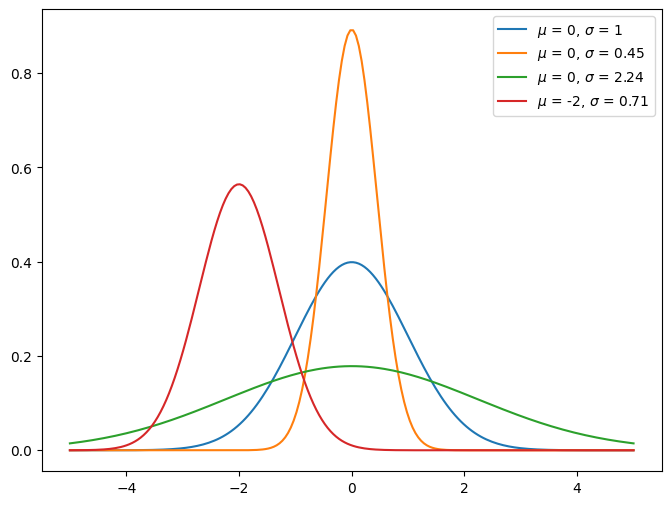

In [326]:
plt.figure(dpi=100, figsize=(8, 6))

plt.plot(X, standard_normal_pdf(X), label=rf'$\mu$ = {0}, $\sigma$ = {1}')

mu = 0
sigma = np.sqrt(.2)
plt.plot(X, normal_pdf(X, mu, sigma), label=rf'$\mu$ = {mu}, $\sigma$ = {sigma:.2f}')

mu = 0
sigma = np.sqrt(5)
plt.plot(X, normal_pdf(X, mu, sigma), label=rf'$\mu$ = {mu}, $\sigma$ = {sigma:.2f}')

mu = -2
sigma = np.sqrt(.5)
plt.plot(X, normal_pdf(X, mu, sigma), label=rf'$\mu$ = {mu}, $\sigma$ = {sigma:.2f}')

plt.legend()

### Các bước kiểm định giả thuyết

1. Phát biểu giả thuyết không và giả thuyết thay thế.
2. Xác định các loại lỗi và hệ quả.
3. Lựa chọn giá trị quan trọng (significance level).
4. Xác định loại kiểm chứng thống kê sẽ sử dụng.
5. Suy luận.

### Bài tập kiểm định giả thuyết

Dữ liệu: tập dữ liệu bao gồm các điểm của học sinh trong các môn học khác nhau.

In [327]:
df = pd.read_csv('data/students_performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [328]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


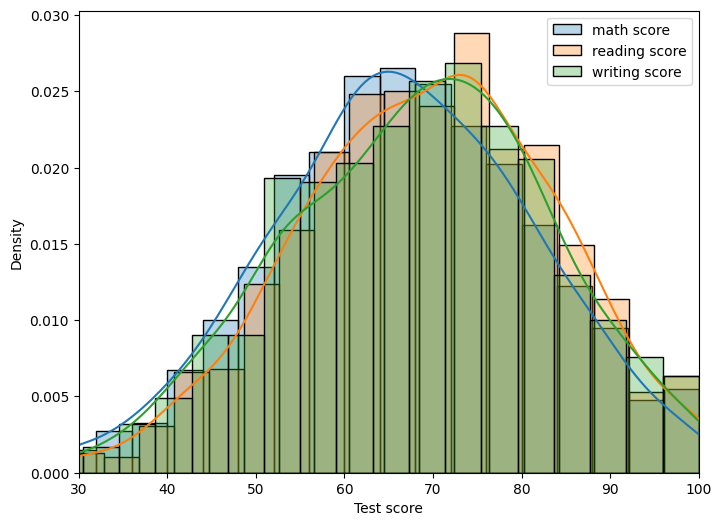

In [329]:
plt.figure(figsize=(8, 6))

sns.histplot(df['math score'], kde=True, label='math score', stat='density', alpha=.3)
sns.histplot(df['reading score'], kde=True, label='reading score', stat='density', alpha=.3)
sns.histplot(df['writing score'], kde=True, label='writing score', stat='density', alpha=.3)

plt.xlim(30, 100)
plt.xlabel('Test score')
plt.legend()

In [330]:
df.mean(numeric_only=True)

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

Giả thuyết 1: Điểm trung bình môn đọc là 70.

- $H_0$: Điểm trung bình môn đọc là 70.
- $H_a$: Điểm trung bình môn đọc không phải 70.
- Mức độ quan trọng $\alpha$ = 0.05 hoặc 5%.
- Lựa chọn kiểm chứng t-test.

Chúng ta cần tính t_statistic theo công thức:

$t=\frac{{\bar{x}}-\mu_{0}}{s/{\sqrt {n}}}$

trong đó $\bar{x}$ là trung bình của tập mẫu, s là độ lệch chuẩn của mẫu và n là kích thước của mẫu.

In [331]:
mu_0 = 70
n = 1000
alpha = .05

In [332]:
# Quiz: Tìm trung bình và độ lệch chuẩn của tập mẫu
mean = df['reading score'].mean()
std = df['reading score'].std()
mean, std

(69.169, 14.600191937252216)

In [333]:
# Test
test_near(mean, 69.169)
test_near(std, 14.60019193725222)

In [334]:
# Quiz: Tính t_statistic theo công thức.
t_statistic = (mean - mu_0) / (std / np.sqrt(n))
t_statistic

-1.7998754721128

In [335]:
# Test
test_near(t_statistic, -1.7998754721127996)

In [336]:
# Quiz: Sử dụng module stats.t.cdf để tìm giá trị p_value tương ứng.
p_value = stats.t.cdf(t_statistic, df=n-1) * 2
p_value

0.07218192108822277

In [337]:
# Test
test_near(p_value, .0721819210882228)

In [338]:
stats.ttest_1samp(df['reading score'], 70, alternative='two-sided')

TtestResult(statistic=-1.7998754721128, pvalue=0.07218192108822277, df=999)

In [339]:
weightstats.ztest(df['reading score'], value=70, alternative='two-sided')

(-1.7998754721128, 0.07188030342251192)

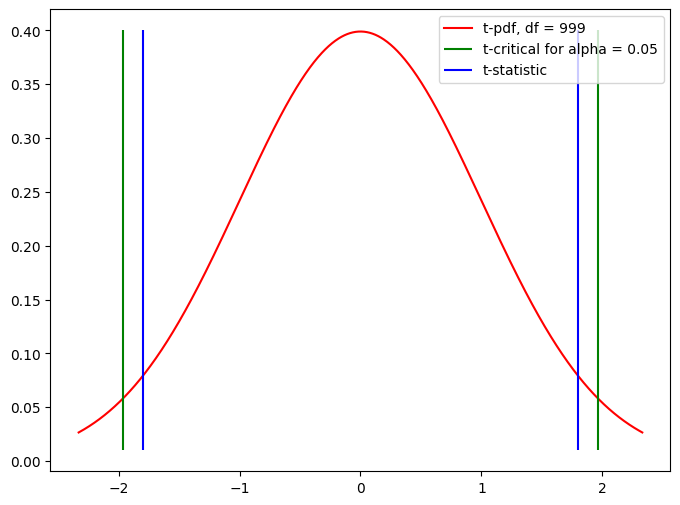

In [340]:
# Quiz: Tính khoảng tin cậy 95% cho trung bình của tập mẫu.
dof = n - 1
x = np.linspace(stats.t.ppf(.01, df=dof), stats.t.ppf(.99, df=dof), 1000)
y = stats.t.pdf(x, dof)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, y, 'r', label=f't-pdf, df = {dof}')
plt.vlines(x=[stats.t.ppf(alpha / 2, dof), -stats.t.ppf(alpha / 2, dof)], ymin=.01, ymax=.4, label=f't-critical for alpha = {alpha}', color='g')
plt.vlines(x=[-t_statistic, t_statistic], ymin=.01, ymax=.4, label='t-statistic', color='b')
plt.legend()

In [341]:
print('Fail to reject H0' if p_value > alpha else 'Reject H0')

Fail to reject H0


Giả thuyết 2: Điểm trung bình môn toán và đọc giống nhau.

- $H_0$: Điểm trung bình môn toán và đọc giống nhau.
- $H_a$: Điểm trung bình môn toán và đọc khác nhau.
- Mức độ quan trọng $\alpha$ = 0.05 hoặc 5%.
- Lựa chọn kiểm chứng t-test.

In [342]:
weightstats.ttest_ind(df['math score'], df['reading score'], usevar='unequal')

(-4.627084038100885, 3.9467939905587526e-06, 1995.1476206033021)

In [343]:
weightstats.ztest(df['math score'], df['reading score'])

(-4.627084038100885, 3.708500620331301e-06)

In [344]:
stats.ttest_ind(df['math score'], df['reading score'], equal_var=False)

TtestResult(statistic=-4.627084038100885, pvalue=3.9467939905587526e-06, df=1995.1476206033021)

### Các loại kiểm định giả thuyết

#### Z-test/T-test

![](pic/1.jpg)

In [345]:
math_mean = df['math score'].mean()
reading_mean = df['reading score'].mean()

math_std = df['math score'].std()
reading_std = df['reading score'].std()

n_math = df['math score'].count()
n_reading = df['reading score'].count()

t_stat, p_val = stats.ttest_ind(df['math score'], df['reading score'], equal_var=False)
t_stat, p_val

(-4.627084038100885, 3.9467939905587526e-06)

#### ANOVA (F-test)

ANOVA (F-test) cho chúng ta biết 2 hoặc nhiều nhóm có tương đồng hay không dựa trên trung bình của chúng và F-score.

Giả thuyết 1: Không có sự khác biệt trong trung bình cộng điểm số từng môn của học sinh.

Tổng bình phương:

$\sum_{i=1}^{a}\sum_{j=1}^{n_i}(Y_{ij}-\overline{\overline{Y}})^2\;=\;\sum_{i=1}^{a}n_i(\overline{Y}_i-\overline{\overline{Y}})^2+\sum_{i=1}^{a}\sum_{j=1}^{n_i}(Y_{ij}-\overline{Y}_i)^2$

$SS(Total)\;     =     \;SS(between)\;     +     \;SS(within)$

Công thức tính tổng bình phương về cơ bản là tính toán tổng của sự thay đổi do sự khác biệt giữa các nhóm và sự thay đổi do sự khác biệt trong mỗi nhóm (sự khác biệt không giải thích được do ngẫu nhiên).

Liên kết với mỗi tổng bình phương là một đại lượng gọi là bậc tự do (DF). Bậc tự do cho biết số lượng phần thông tin độc lập được sử dụng để tính tổng mỗi bình phương. Chúng
ta chia mỗi tổng bình phương cho các bậc tự do tương ứng để thu được bình phương trung bình.

$MS(between) = \frac{SS(between)}{DF\_between}$

$MS(within) = \frac{SS(within)}{DF\_within}$

F-score được tính như sau:

$F = \frac{MS(between)}{MS(within)}$

In [346]:
m_math, m_reading, m_writing = df.select_dtypes(include=[np.number]).mean()
m_total = df.select_dtypes(include=[np.number]).mean().mean()
m_math, m_reading, m_writing

(66.089, 69.169, 68.054)

In [347]:
n_samples = 1000
n_cols = 3

In [348]:
ss_between = n_samples * ((m_math - m_total) ** 2 + (m_reading - m_total) ** 2 + (m_writing - m_total) ** 2)
ss_between

4863.616666666663

In [349]:
# Test
test_near(4863.616666666663, ss_between)

In [350]:
var_values = df.select_dtypes(include=[np.number]).var()
var_values

math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64

In [351]:
ss_math, ss_reading, ss_writing = df.select_dtypes(include=[np.number]).var(ddof=0) * n_samples

In [352]:
ss_within = ss_math + ss_reading + ss_writing
ss_within

673318.602

In [353]:
# Test
test_near(673318.6020000002, ss_within)

In [354]:
df_between = n_cols - 1
ms_between = ss_between / df_between
ms_between

2431.8083333333316

In [355]:
df_within = n_samples * n_cols - n_cols
ms_within = ss_within / df_within
ms_within

224.6641981981982

In [356]:
f_score = ms_between / ms_within
print(f'Calculated F-score is: {f_score}')

Calculated F-score is: 10.82419162837862


In [357]:
df_between, df_within

(2, 2997)

In [358]:
# Quiz: Tìm p-value tương ứng với f_score
p_value = stats.f.sf(f_score, df_between, df_within)
p_value

2.0701893192229333e-05

In [359]:
# Test
test_near(p_value, 2.0701893192229333e-05)

In [360]:
# Quiz: Kiểm tra F-test bằng module scipy.stats.f_oneway
f_statistic, p_value = stats.f_oneway(df['math score'], df['reading score'], df['writing score'])
f_statistic, p_value

(10.824191628378626, 2.0701893192229333e-05)

In [361]:
# Test
test_near(10.824191628378626, f_statistic)
test_near(2.0701893192229333e-05, p_value)

In [362]:
# Quiz: Tìm giá trị quan trọng (F-critical)
alpha = .1
df_between = n_cols - 1
df_within = n_samples * n_cols - n_cols
f_critical = stats.f.ppf(1 - alpha, df_between, df_within)
f_critical

2.304355067891861

In [363]:
# Test
test_near(2.304355067891861, f_critical)

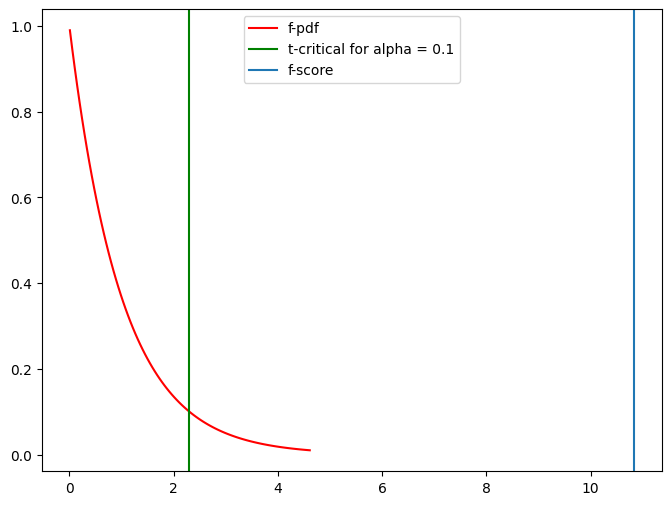

In [364]:
dfn, dfd = df_between, df_within
x = np.linspace(stats.f.ppf(.01, dfn, dfd), stats.f.ppf(.99, dfn, dfd), 100)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, stats.f.pdf(x, dfn, dfd), 'r', label='f-pdf')
plt.axvline(x=stats.f.ppf(1 - alpha, dfn, dfd), label=f't-critical for alpha = {alpha}', color='g')
plt.axvline(x=f_score, label='f-score')
plt.legend()

Bởi vì giá trị F-score chúng ta tìm được rơi ngoài khoảng chấp nhận và p-value cũng rất nhỏ, chúng ta có đủ bằng chứng để loại giả thuyết không.

Nếu $H_0$ bị loại bỏ, chúng ta có thể kết luận rằng ít nhất trung bình của một nhóm là khác biệt. Tuy nhiên chúng ta không biết đó là nhóm nào và cần thực hiện T-test cho từng cặp để tìm ra.

#### Chi-Square Test

Thử nghiệm được áp dụng khi bạn có hai biến phân loại (categorial variables) từ một tập quần thể duy nhất. Nó được sử dụng để xác định liệu có mối liên hệ đáng kể giữa hai biến hay không.

Giả thuyết 2: Không có mối quan hệ giữa giới tính và học lực.

$X^2 = \frac{(Observed - Expected)^2}{Expected}$

In [365]:
df['overall_performance'] = df.iloc[:, 5:].mean(axis=1)

In [366]:
df['verdict'] = df['overall_performance'] >= 40

In [367]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_performance,verdict
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,True
1,female,group C,some college,standard,completed,69,90,88,82.333333,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,True
4,male,group C,some college,standard,none,76,78,75,76.333333,True


In [368]:
contingency_table = pd.crosstab(df['gender'], df['verdict'], margins=True)
contingency_table

verdict,False,True,All
gender,,,
female,16,502,518
male,14,468,482
All,30,970,1000


P(gender = female & verdict = False) = P(gender = female) * P(verdict = False) = 518 / 1000 * 30 / 1000

expected_value = 518 / 1000 * 30

In [369]:
observed_values = np.append(contingency_table.iloc[0, :2].values, contingency_table.iloc[1, :2].values)
observed_values

array([ 16, 502,  14, 468], dtype=int64)

In [370]:
overall_total = df.shape[0]
overall_total

1000

In [371]:
gender_total = contingency_table.iloc[0: 2, 2].values
verdict_total = contingency_table.iloc[2, 0: 2].values
gender_total, verdict_total

(array([518, 482], dtype=int64), array([ 30, 970], dtype=int64))

In [372]:
expected_values = [gender_total[i] * verdict_total[j] / overall_total for i in range(2) for j in range(2)]
expected_values

[15.54, 502.46, 14.46, 467.54]

In [373]:
dof = (2 - 1) * (2 - 1)
chi_square_value = np.sum((observed_values - expected_values) ** 2 / expected_values)
print(f'Chi square value: {chi_square_value}')
print('Chi square critical:', stats.chi2.ppf(1 - alpha, dof))

Chi square value: 0.029123654909683938
Chi square critical: 2.705543454095404


In [374]:
# Quiz: Tìm p_value tương ứng
p_value = stats.chi2.sf(chi_square_value, dof)
p_value

0.8644938368660299

In [375]:
# Test
test_near(p_value, .8644938368660299)

In [376]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table.iloc[:2, :2].values, correction=False, lambda_='pearson')
stat, p, dof, expected

(0.029123654909683938,
 0.8644938368660299,
 1,
 array([[ 15.54, 502.46],
        [ 14.46, 467.54]]))

In [377]:
# Quiz: sử dụng module scipy.stats.chisquare cho chi square test.
chi_statistic, p_value = stats.chisquare(observed_values, expected_values, ddof=2)
chi_statistic, p_value

(0.029123654909683938, 0.8644938368660299)

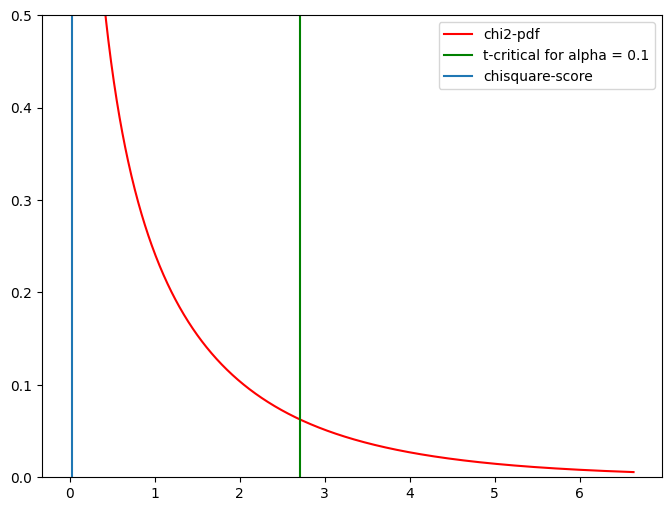

In [378]:
x = np.linspace(stats.chi2.ppf(.01, dof), stats.chi2.ppf(.99, dof), 1000)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, stats.chi2.pdf(x, dof), 'r', label='chi2-pdf')
plt.axvline(x=stats.chi2.ppf(1 - alpha, dof), label=f't-critical for alpha = {alpha}', color='g')
plt.axvline(x=chi_square_value, label='chisquare-score')
plt.ylim(0, .5)
plt.legend()

Vì giá trị Chi-square được tính toán nhỏ hơn giá trị tới hạn, chúng ta không thể bác bỏ giả thuyết không rằng không có mối quan hệ giữa giới tính và thành tích tổng thể của học sinh.

#### A/B Testing


Dữ liệu về tỷ lệ chuyển đổi của 2 phiên bản website.

Kiểm tra giả thuyết tỷ lệ chuyển đổi của phiên bản website B cao hơn tỷ lệ chuyển đổi của phiên bản website A.

Lựa chọn $\alpha$ = 0.05 và kiểm định t-test vì kiểm định này phổ biến trong A/B Testing.

In [379]:
data = pd.read_csv('data/ab_data.csv')
data.head(10)

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19
5,6,0.13,0.17
6,7,0.14,0.18
7,8,0.23,0.20
8,9,0.11,0.17
9,10,0.15,0.22


<Axes: xlabel='Conversion_A', ylabel='Density'>

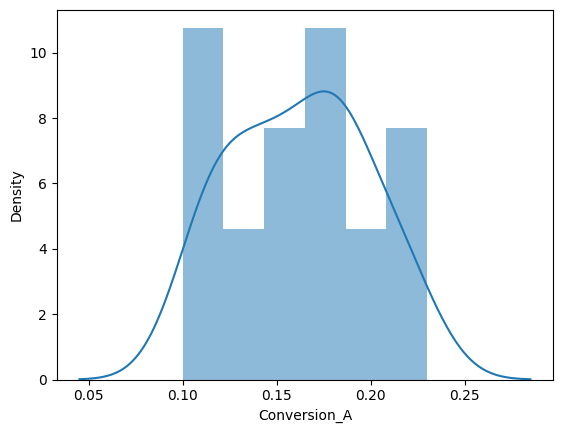

In [380]:
sns.histplot(data.Conversion_A, kde=True, stat='density', linewidth=0, kde_kws=dict(cut=3))

<Axes: xlabel='Conversion_B', ylabel='Density'>

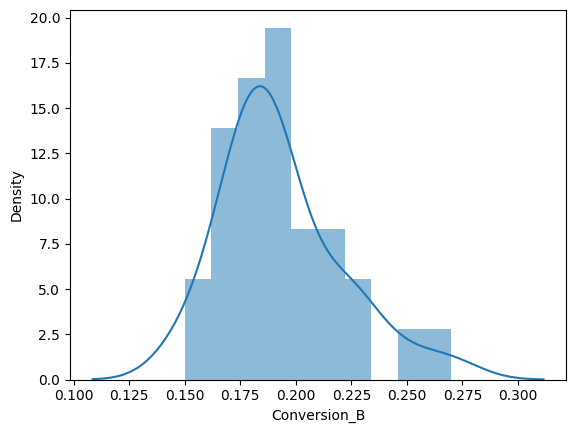

In [381]:
sns.histplot(data.Conversion_B, kde=True, stat='density', linewidth=0, kde_kws=dict(cut=3))

In [382]:
weightstats.ttest_ind(data.Conversion_A, data.Conversion_B, usevar='unequal', alternative='smaller')

(-3.7873679309192934, 0.00019226786972932177, 53.99688197413233)

In [383]:
stats.ttest_ind(data.Conversion_A, data.Conversion_B, equal_var=False, alternative='less')

TtestResult(statistic=-3.78736793091929, pvalue=0.00019226786972932402, df=53.99688197413234)

# BÀI TẬP

## Đề Bài

Kiểm định giả thuyết không có sự khác nhau về điểm trung bình giữa học sinh tham gia và không tham gia bài kiểm tra trước khoá học. Lựa chọn $\alpha$ = 0.05.
1. Hãy thực hiện theo ít nhất 1 trong những cách sau: sử dụng công thức (nếu được, tham khảo [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances_(sX1_%3E_2sX2_or_sX2_%3E_2sX1))) và sử dụng thư viện.
2. Vẽ phân bố xác suất tương ứng và vị trí của các điểm statistic và critical.

## Bài Làm

### Bài 1

In [384]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
group_completed = df[df['test preparation course'] == 'completed']['average_score']
group_none = df[df['test preparation course'] == 'none']['average_score']

t_stat, p_val = stats.ttest_ind(group_completed, group_none, equal_var=False)
t_stat, p_val

(8.594538326688614, 4.426725271318694e-17)

### Bài 2

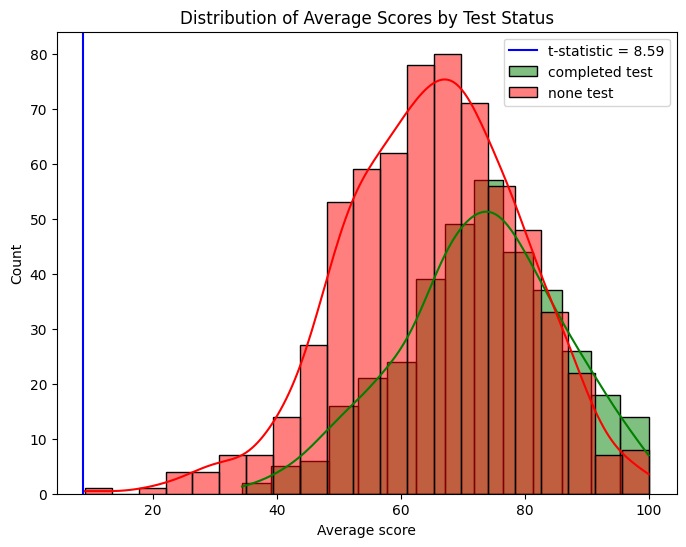

In [385]:
plt.figure(figsize=(8, 6))

sns.histplot(group_completed, color='g', label='completed test', kde=True)
sns.histplot(group_none, color='r', label='none test', kde=True)

plt.axvline(x=t_stat, color='b', label=f't-statistic = {t_stat:.2f}')

plt.title('Distribution of Average Scores by Test Status')
plt.xlabel('Average score')
plt.legend()

#### Giả thuyết và Kết luận

- **Giả thuyết không ($H_0$):** Không có sự khác biệt đáng kể về điểm số trung bình giữa các nhóm.
- **Giả thuyết nghịch ($H_1$):** Có sự khác biệt đáng kể về điểm số trung bình giữa các nhóm.

Sau khi tiến hành kiểm định, ta sẽ dựa vào p-value để quyết định:
- Nếu p-value < mức ý nghĩa (thường là 0.05), ta bác bỏ giả thuyết không và chấp nhận giả thuyết nghịch, cho thấy có sự khác biệt đáng kể.
- Nếu p-value >= mức ý nghĩa, ta không bác bỏ giả thuyết không, cho thấy không có sự khác biệt đáng kể.

In [386]:
scores_completed = df[df['test preparation course'] == 'completed']['math score']
scores_none = df[df['test preparation course'] == 'none']['math score']

t_stat, p_val = stats.ttest_ind(scores_completed, scores_none, equal_var=False)
t_stat, p_val

(5.786983157907755, 1.0425616722069513e-08)

Satterthwaite Formula for Degrees of Freedom

![](pic/3.jpg)

In [387]:
# Welch-Satterthwaite equation
def welch_satterthwaite_df(sample1, sample2):
    sd1 = np.var(sample1, ddof=1)
    sd2 = np.var(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    df = ((sd1 / n1 + sd2 / n2) ** 2) / ((sd1 / n1) ** 2 / (n1 - 1) + (sd2 / n2) ** 2 / (n2 - 1))
    return df

In [388]:
alpha = .05

In [389]:
df = welch_satterthwaite_df(scores_completed, scores_none)
t_crit = np.abs(stats.t.ppf(alpha / 2, df))
df, t_crit

(770.0791097809667, 1.9630493048916013)

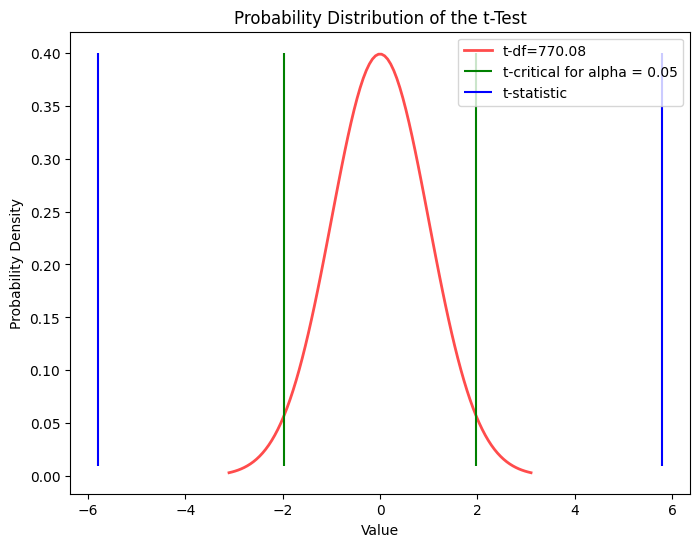

In [390]:
x = np.linspace(stats.t.ppf(.001, df), stats.t.ppf(.999, df), 100)
pdf = stats.t.pdf(x, df)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r', lw=2, alpha=.7, label=f't-df={df:.2f}')
plt.vlines(x=[t_crit, -t_crit], ymin=.01, ymax=.4, label=f't-critical for alpha = {alpha}', color='g')
plt.vlines(x=[-t_stat, t_stat], ymin=.01, ymax=.4, label='t-statistic', color='b')
plt.title('Probability Distribution of the t-Test')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()